In [1]:
from time import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from tools.common_methods import get_train_test_data, print_results

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [3]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
n_estimators = 5000

In [0]:
best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=5000, max_features=12, random_state=1)
best_gbr.fit(X_train, y_train)

y_pred = best_gbr.predict(X_test)
print_results(y_test, y_pred)

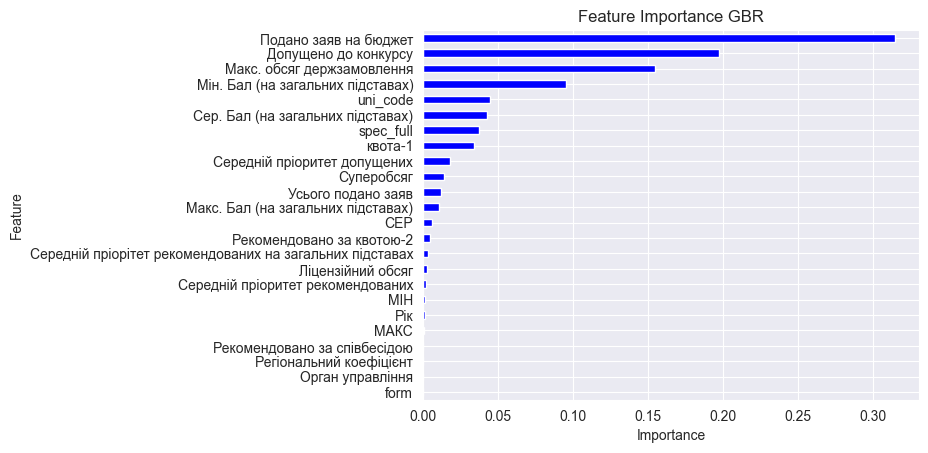

In [7]:
importances = pd.Series(best_gbr.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance GBR")
plt.show()

In [8]:
results_df = pd.DataFrame(columns=['Model', 'Amount of features', 'MSE', 'R2 Score'])

best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=n_estimators, random_state=1)
xgb_regressor = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=n_estimators, seed=1)
best_lgbm = LGBMRegressor(learning_rate=0.13, max_depth=7, n_estimators=n_estimators, n_jobs=-1, num_leaves=10, random_state=1, verbose=-1)
best_random_forest = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=151, max_depth=16)

for n in range(1, 25):
    start = time()
    n_best_features = importances.sort_values(ascending=False).head(n).keys()
    x_train_n_features = X_train.get(n_best_features)
    x_train_n_features_std = sc.fit_transform(x_train_n_features)

    x_test_n_features = X_test.get(n_best_features)
    x_test_n_features_std = sc.transform(x_test_n_features)

    best_gbr.fit(x_train_n_features_std, y_train)
    y_pred_gbr = best_gbr.predict(x_test_n_features_std)
    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)
    results_df = results_df.append(
        {'Model': 'GradientBoostingRegressor', 'Amount of features': n, 'MSE': mse_gbr, 'R2 Score': r2_gbr},
        ignore_index=True)


    xgb_regressor.fit(x_train_n_features_std, y_train)
    y_pred_xgb = xgb_regressor.predict(x_test_n_features_std)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    results_df = results_df.append(
        {'Model': 'XGBRegressor', 'Amount of features': n, 'MSE': mse_xgb, 'R2 Score': r2_xgb},
        ignore_index=True)

    best_lgbm.fit(x_train_n_features_std, y_train)
    y_pred_lgbm = best_lgbm.predict(x_test_n_features_std)
    mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
    r2_lgbm = r2_score(y_test, y_pred_lgbm)
    results_df = results_df.append(
        {'Model': 'LGBMRegressor', 'Amount of features': n, 'MSE': mse_lgbm, 'R2 Score': r2_lgbm},
        ignore_index=True)

    best_random_forest.fit(x_train_n_features, y_train)
    y_pred_rf = best_random_forest.predict(x_test_n_features)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    results_df = results_df.append(
        {'Model': 'RandomForestRegressor', 'Amount of features': n, 'MSE': mse_rf, 'R2 Score': r2_rf},
        ignore_index=True)

    print(n, '- time for the round:', time() - start)

1 - time for the round: 31.303065299987793
2 - time for the round: 40.75265407562256
3 - time for the round: 46.5341956615448
4 - time for the round: 76.05731773376465
5 - time for the round: 87.27994966506958
6 - time for the round: 115.1986243724823
7 - time for the round: 125.39642524719238
8 - time for the round: 132.6157808303833
9 - time for the round: 148.35487914085388
10 - time for the round: 160.04058527946472
11 - time for the round: 173.60805106163025
12 - time for the round: 194.2698347568512
13 - time for the round: 209.0954954624176
14 - time for the round: 212.0434308052063
15 - time for the round: 223.7885570526123
16 - time for the round: 233.54055190086365
17 - time for the round: 294.617050409317
18 - time for the round: 287.39248967170715
19 - time for the round: 282.43426156044006
20 - time for the round: 302.48034381866455
21 - time for the round: 285.9356064796448
22 - time for the round: 284.60372376441956
23 - time for the round: 288.06605100631714
24 - time f

In [39]:
results_df.to_csv('../readyDatasets/features_comparing_gbr.csv', index=False)
results_df

,Model,Amount of features,MSE,R2 Score
0,GradientBoostingRegressor,1,445.293606,0.713025
1,XGBRegressor,1,465.577846,0.699953
2,LGBMRegressor,1,588.787503,0.620549
3,RandomForestRegressor,1,423.145006,0.727299
4,GradientBoostingRegressor,2,385.493284,0.751564
...,...,...,...,...
91,RandomForestRegressor,23,53.166641,0.965736
92,GradientBoostingRegressor,24,36.845677,0.976254
93,XGBRegressor,24,35.474590,0.977138
94,LGBMRegressor,24,44.233258,0.971493


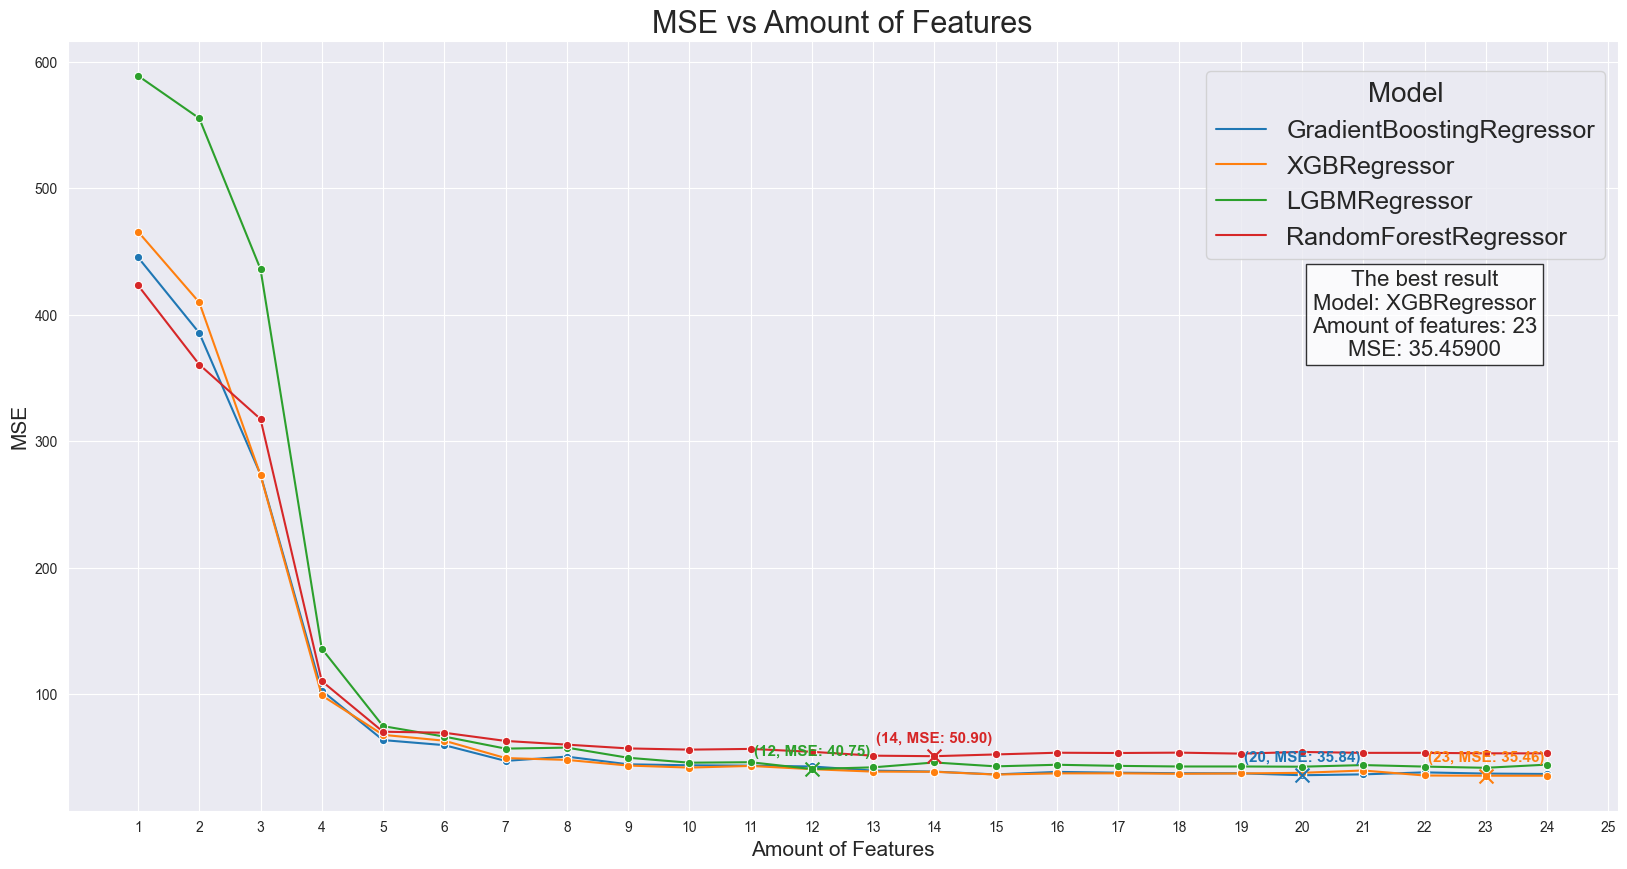

In [40]:
min_mse_indices = results_df.groupby('Model')['MSE'].idxmin()

model_colors = {model: color for model, color in zip(results_df['Model'].unique(), sns.color_palette("tab10", n_colors=len(results_df['Model'].unique())))}

plt.figure(figsize=(20, 10))
sns.lineplot(x='Amount of features', y='MSE', hue='Model', data=results_df, marker='o', palette=model_colors)

for index in min_mse_indices:
    model_color = model_colors[results_df.loc[index, 'Model']]
    plt.scatter(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'MSE'],
                color=model_color, marker='x', s=100, zorder=5)

    plt.annotate(
        f"({results_df.loc[index, 'Amount of features']}, MSE: {results_df.loc[index, 'MSE']:.2f})",
        xy=(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'MSE']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        color=model_color,
        size='11',
        weight='bold'
    )

plt.xticks(range(1, 26))
plt.title('MSE vs Amount of Features', size=22)
plt.xlabel('Amount of Features', size=15)
plt.ylabel('MSE', size=15)
plt.legend(title='Model', bbox_to_anchor=(1, 0.7), loc='lower right', fontsize=18, title_fontsize=20)
plt.grid(True)

absolute_winner_index = results_df['MSE'].idxmin()
winner_info = f"The best result\n" \
              f"Model: {results_df.loc[absolute_winner_index, 'Model']}\n" \
              f"Amount of features: {results_df.loc[absolute_winner_index, 'Amount of features']}\n" \
              f"MSE: {results_df.loc[absolute_winner_index, 'MSE']:.5f}"
plt.text(22, 400, winner_info, ha='center', va='center', fontsize=16,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

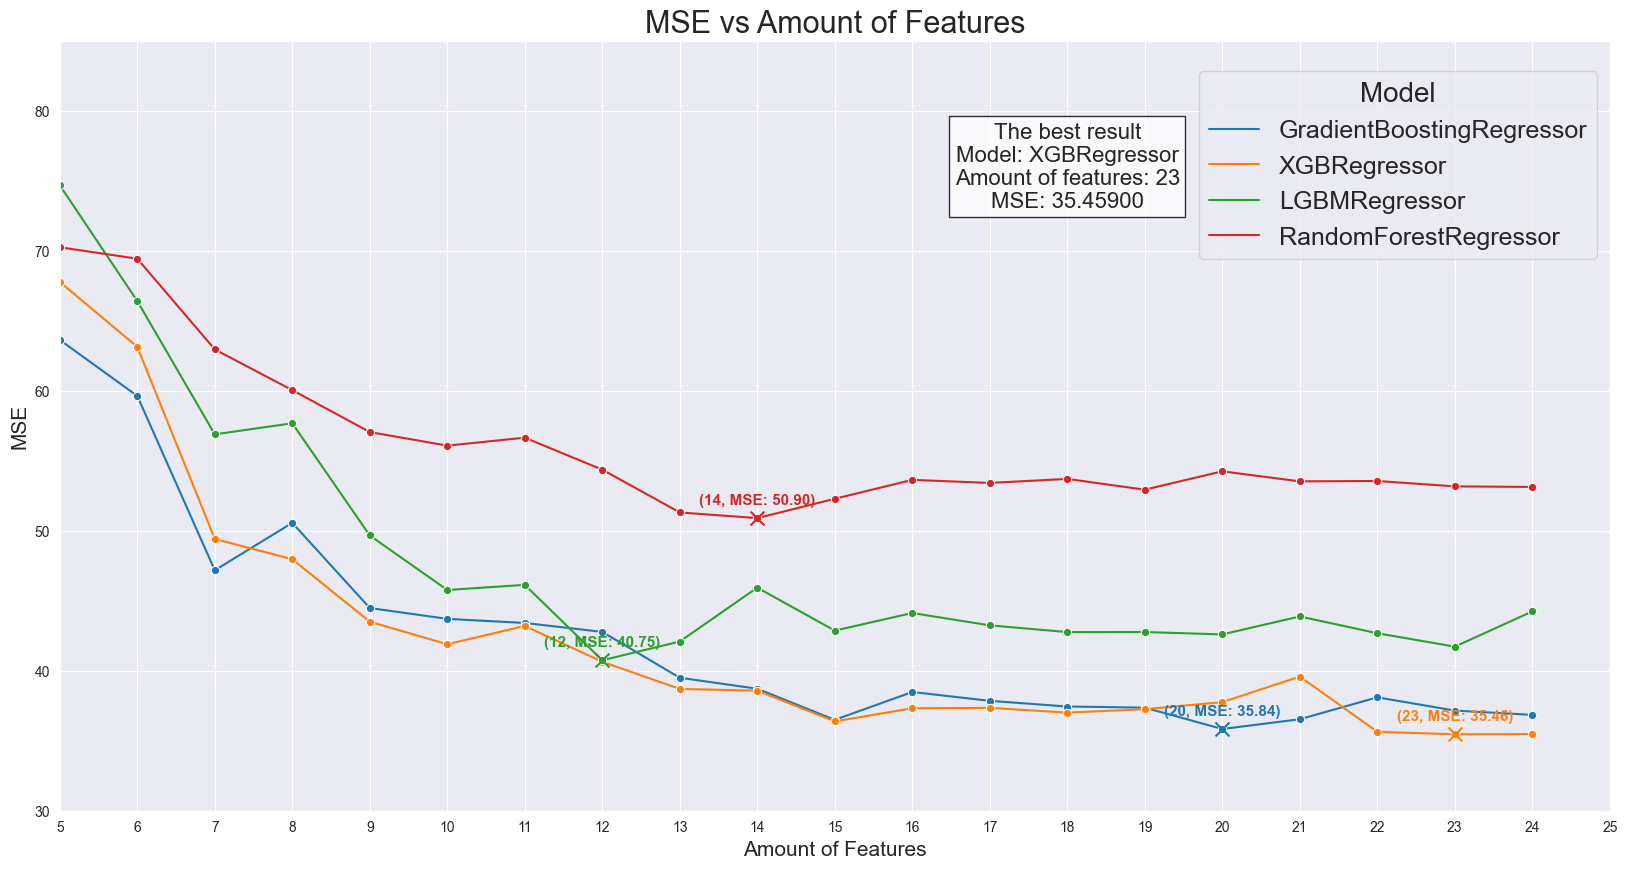

In [41]:
min_mse_indices = results_df.groupby('Model')['MSE'].idxmin()

model_colors = {model: color for model, color in zip(results_df['Model'].unique(), sns.color_palette("tab10", n_colors=len(results_df['Model'].unique())))}

plt.figure(figsize=(20, 10))
sns.lineplot(x='Amount of features', y='MSE', hue='Model', data=results_df, marker='o', palette=model_colors)

for index in min_mse_indices:
    model_color = model_colors[results_df.loc[index, 'Model']]
    plt.scatter(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'MSE'],
                color=model_color, marker='x', s=100, zorder=5)

    plt.annotate(
        f"({results_df.loc[index, 'Amount of features']}, MSE: {results_df.loc[index, 'MSE']:.2f})",
        xy=(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'MSE']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        color=model_color,
        size='11',
        weight='bold'
    )

plt.xticks(range(1, 26))
plt.xlim(5, 25)
plt.ylim(30,85)
plt.title('MSE vs Amount of Features', size=22)
plt.xlabel('Amount of Features', size=15)
plt.ylabel('MSE', size=15)
plt.legend(title='Model', bbox_to_anchor=(1, 0.7), loc='lower right', fontsize=18, title_fontsize=20)
plt.grid(True)

absolute_winner_index = results_df['MSE'].idxmin()
winner_info = f"The best result\n" \
              f"Model: {results_df.loc[absolute_winner_index, 'Model']}\n" \
              f"Amount of features: {results_df.loc[absolute_winner_index, 'Amount of features']}\n" \
              f"MSE: {results_df.loc[absolute_winner_index, 'MSE']:.5f}"
plt.text(18, 76, winner_info, ha='center', va='center', fontsize=16,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

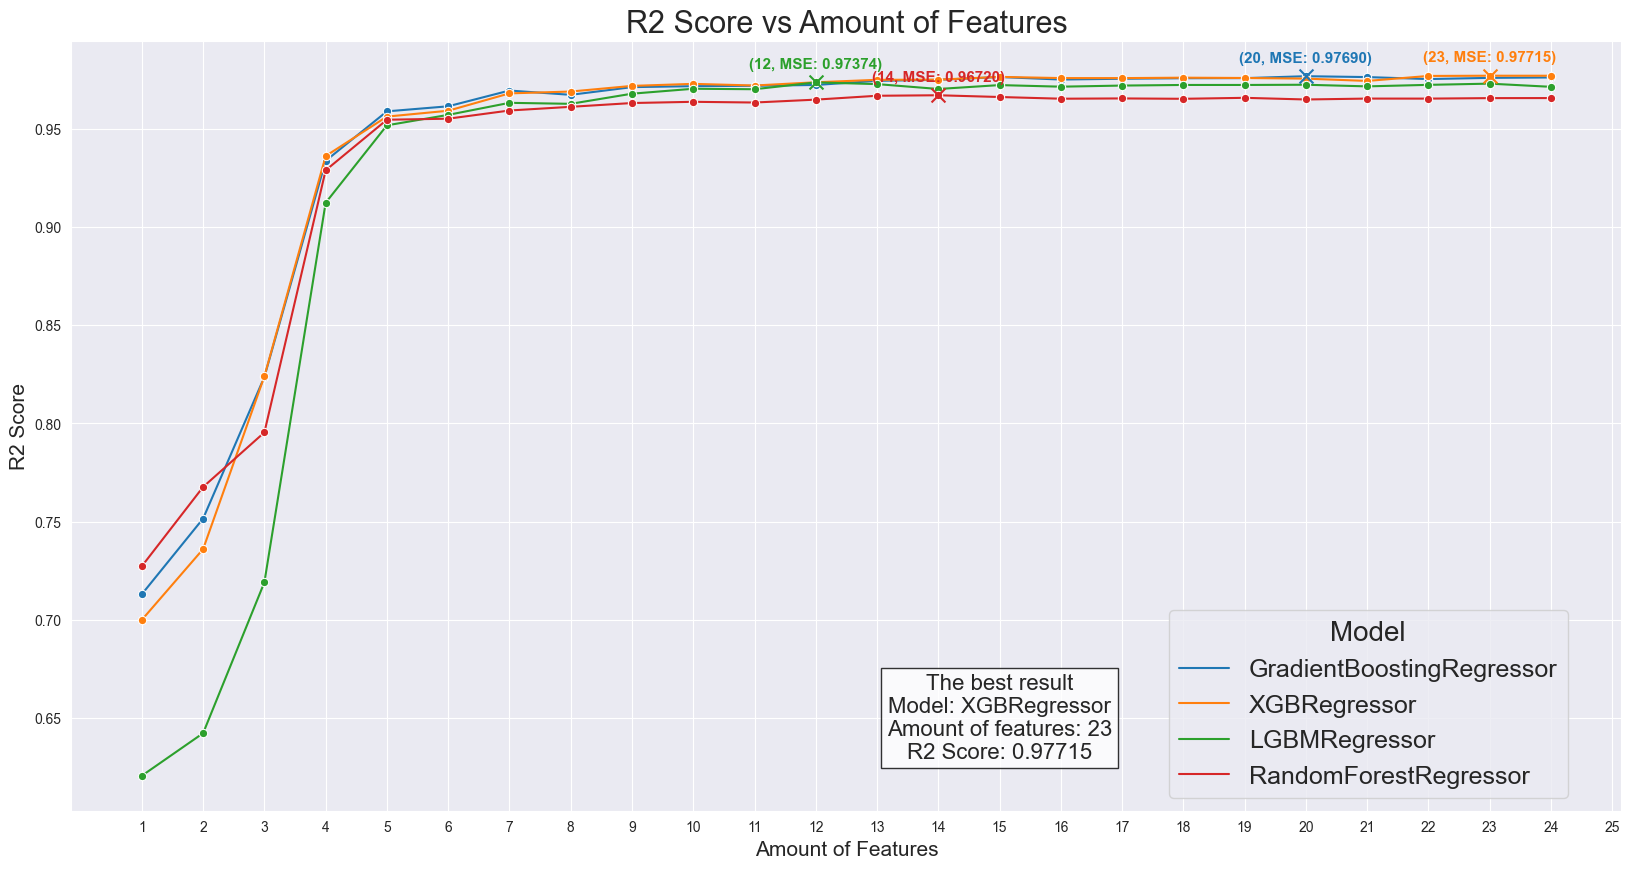

In [42]:
max_r2_indices = results_df.groupby('Model')['R2 Score'].idxmax()

model_colors = {model: color for model, color in zip(results_df['Model'].unique(), sns.color_palette("tab10", n_colors=len(results_df['Model'].unique())))}

plt.figure(figsize=(20, 10))
sns.lineplot(x='Amount of features', y='R2 Score', hue='Model', data=results_df, marker='o', palette=model_colors)

for index in max_r2_indices:
    model_color = model_colors[results_df.loc[index, 'Model']]
    plt.scatter(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'R2 Score'],
                color=model_color, marker='x', s=100, zorder=5)

    plt.annotate(
        f"({results_df.loc[index, 'Amount of features']}, MSE: {results_df.loc[index, 'R2 Score']:.5f})",
        xy=(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'R2 Score']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        color=model_color,
        size='11',
        weight='bold'
    )

plt.xticks(range(1, 26))
plt.title('R2 Score vs Amount of Features', size=22)
plt.xlabel('Amount of Features', size=15)
plt.ylabel('R2 Score', size=15)
plt.legend(title='Model', bbox_to_anchor=(0.7, 0), loc='lower left', fontsize=18, title_fontsize=20)
plt.grid(True)

absolute_winner_index = results_df['R2 Score'].idxmax()
winner_info = f"The best result\n" \
              f"Model: {results_df.loc[absolute_winner_index, 'Model']}\n" \
              f"Amount of features: {results_df.loc[absolute_winner_index, 'Amount of features']}\n" \
              f"R2 Score: {results_df.loc[absolute_winner_index, 'R2 Score']:.5f}"
plt.text(15, 0.65, winner_info, ha='center', va='center', fontsize=16,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

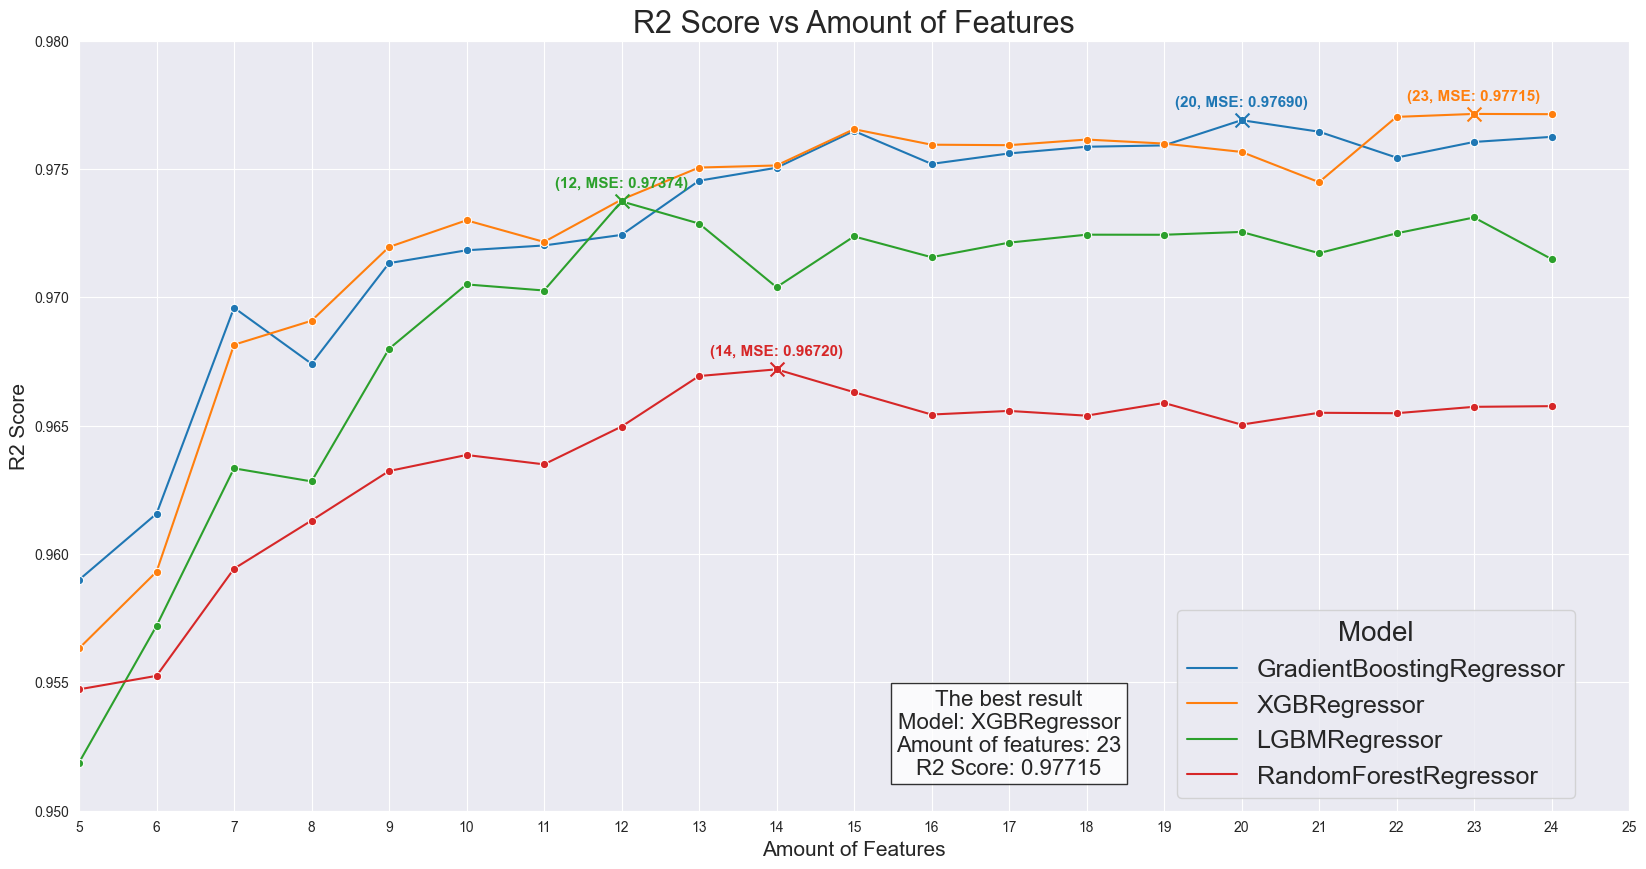

In [43]:
max_r2_indices = results_df.groupby('Model')['R2 Score'].idxmax()

model_colors = {model: color for model, color in zip(results_df['Model'].unique(), sns.color_palette("tab10", n_colors=len(results_df['Model'].unique())))}

plt.figure(figsize=(20, 10))
sns.lineplot(x='Amount of features', y='R2 Score', hue='Model', data=results_df, marker='o', palette=model_colors)

for index in max_r2_indices:
    model_color = model_colors[results_df.loc[index, 'Model']]
    plt.scatter(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'R2 Score'],
                color=model_color, marker='x', s=100, zorder=5)

    plt.annotate(
        f"({results_df.loc[index, 'Amount of features']}, MSE: {results_df.loc[index, 'R2 Score']:.5f})",
        xy=(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'R2 Score']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        color=model_color,
        size='11',
        weight='bold'
    )

plt.xticks(range(1, 26))
plt.xlim(5, 25)
plt.ylim(0.95, 0.98)
plt.title('R2 Score vs Amount of Features', size=22)
plt.xlabel('Amount of Features', size=15)
plt.ylabel('R2 Score', size=15)
plt.legend(title='Model', bbox_to_anchor=(0.7, 0), loc='lower left', fontsize=18, title_fontsize=20)
plt.grid(True)

absolute_winner_index = results_df['R2 Score'].idxmax()
winner_info = f"The best result\n" \
              f"Model: {results_df.loc[absolute_winner_index, 'Model']}\n" \
              f"Amount of features: {results_df.loc[absolute_winner_index, 'Amount of features']}\n" \
              f"R2 Score: {results_df.loc[absolute_winner_index, 'R2 Score']:.5f}"
plt.text(17, 0.953, winner_info, ha='center', va='center', fontsize=16,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()